<a href="https://colab.research.google.com/github/zarinhadika/ML/blob/main/MagicRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("/content/magic04.data",names=cols)

In [3]:
df['class']=(df['class']=='g').astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


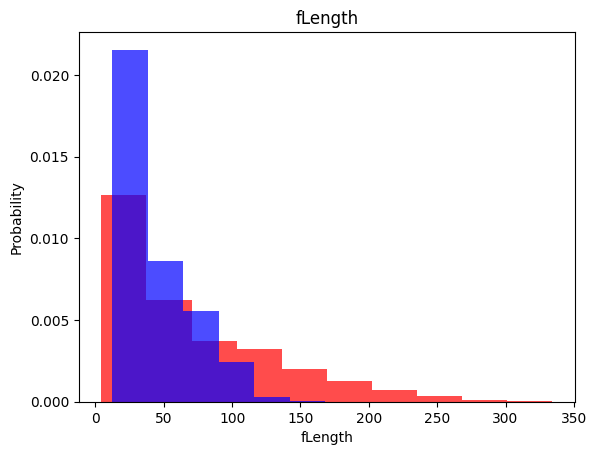

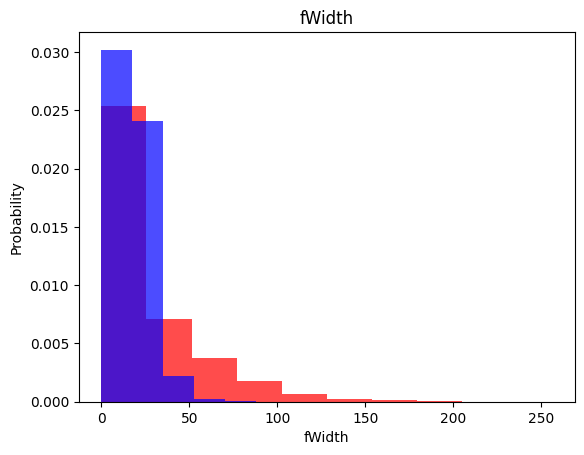

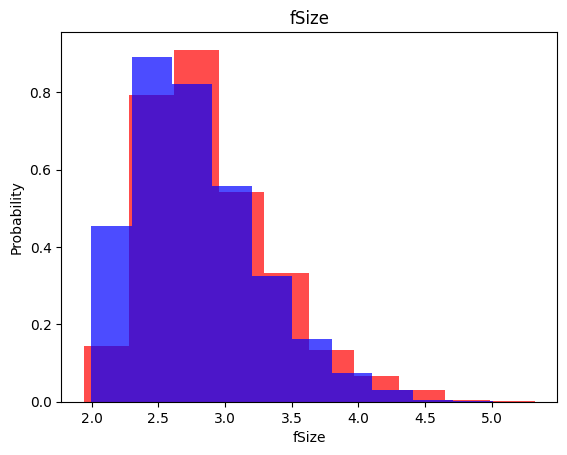

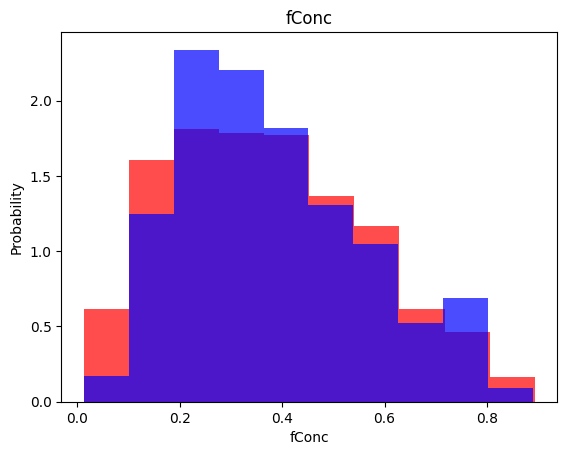

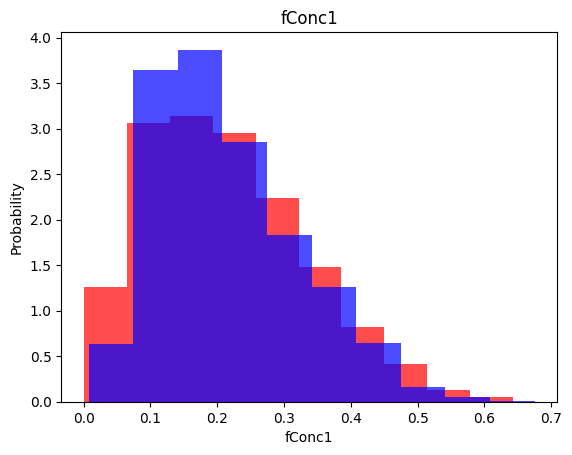

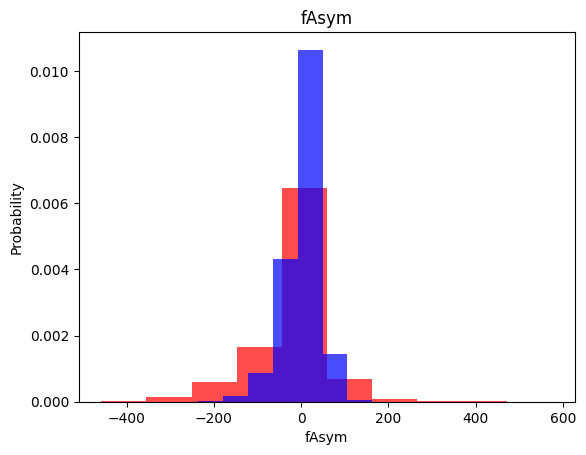

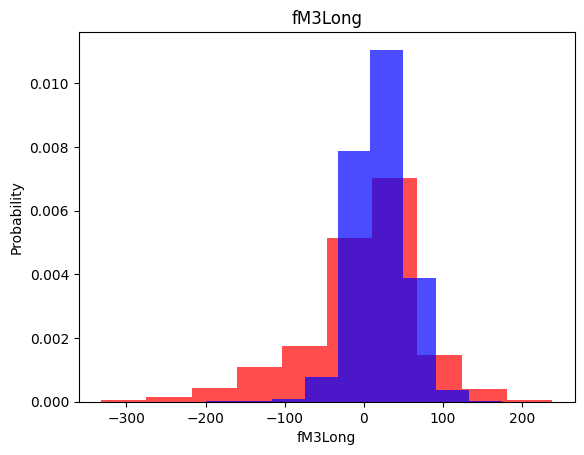

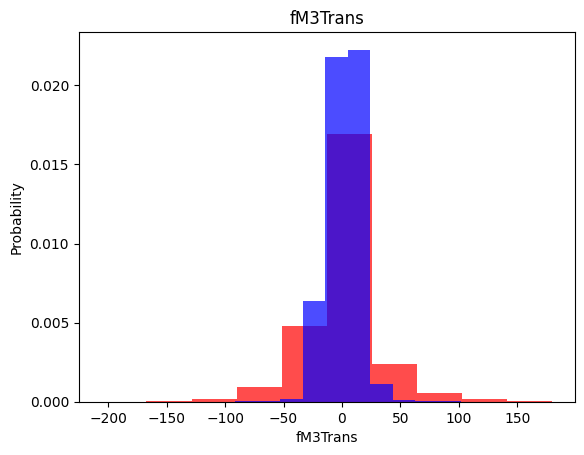

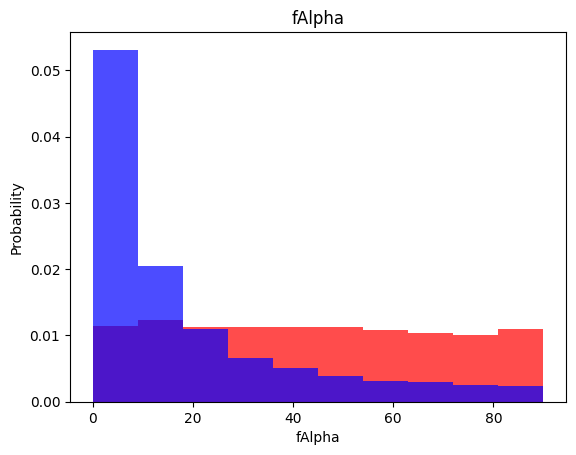

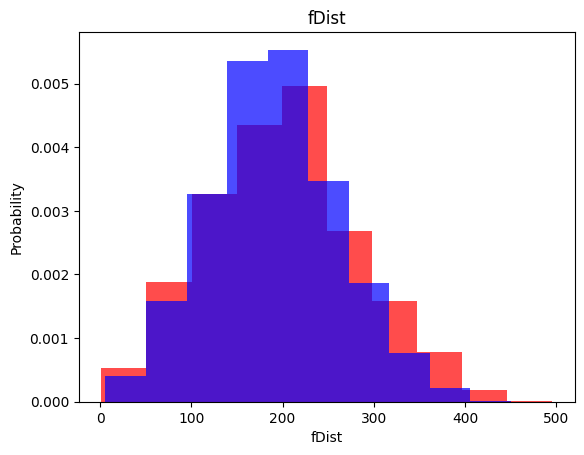

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['class']==0][label],color='red',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==1][label],color='blue',label='hydron',alpha=0.7,density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.show()

In [6]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
len(train[train['class']==0])

4031

In [8]:
len(train[train['class']==1])

7381

In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
def scale_dataset(dataframe,oversample=False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    ros=RandomOverSampler()
    if(oversample):
     X,y=ros.fit_resample(X,y)
    data=np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y

In [10]:
train,X_train,y_train=scale_dataset(df.sample(frac=1),oversample=True)
valid,X_valid,y_valid=scale_dataset(df.sample(frac=1),oversample=False)
test,X_test,y_test=scale_dataset(df.sample(frac=1),oversample=False)


In [11]:
len(train)

24664

In [12]:
print(sum(train==1))

[    0     0     0     0     0     0     0     0     0     0 12332]


In [13]:
print(sum(train==0))

[    0     0     0     0     0     0     0     0     0     0 12332]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6688
           1       0.92      0.91      0.92     12332

    accuracy                           0.89     19020
   macro avg       0.88      0.89      0.88     19020
weighted avg       0.89      0.89      0.89     19020



In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6688
           1       0.89      0.90      0.90     12332

    accuracy                           0.87     19020
   macro avg       0.86      0.85      0.85     19020
weighted avg       0.87      0.87      0.87     19020



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      6688
           1       0.84      0.82      0.83     12332

    accuracy                           0.78     19020
   macro avg       0.76      0.77      0.77     19020
weighted avg       0.79      0.78      0.79     19020



In [31]:
import tensorflow as tf
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
     tf.keras.layers.Dense(32,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')

])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=nn_model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
X_train.shape

(24664, 10)

In [33]:
y_pred=nn_model.predict(X_test)

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
y_pred=nn_model.predict(X_test).ravel()
y_pred=(y_pred >= 0.5).astype(int)


595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      6688
           1       0.89      0.95      0.92     12332

    accuracy                           0.89     19020
   macro avg       0.90      0.87      0.88     19020
weighted avg       0.89      0.89      0.89     19020



In [36]:
def plot_loss(history):
      plt.plot(history.history['loss'],label='loss')
      plt.plot(history.history['val_loss'],label='val_loss')
      plt.xlabel('Epochs')
      plt.ylabel('Binary_Cross_Entropy')
      plt.legend()
      plt.grid()
      plt.show()
def plot_accuracy(history):
      plt.plot(history.history['accuracy'],label='accuracy')
      plt.plot(history.history['val_accuracy'],label='val_accuracy')
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.grid()
      plt.show()



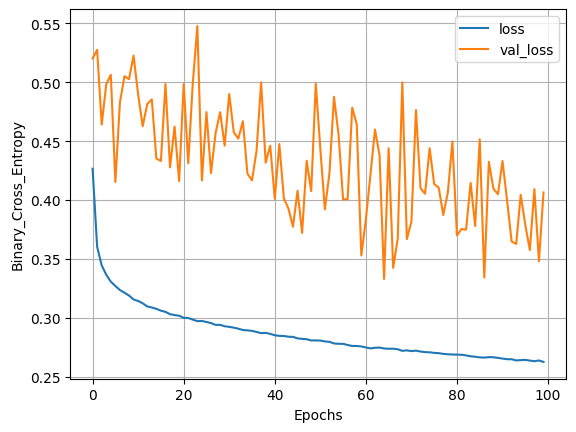

In [37]:
plot_loss(history)

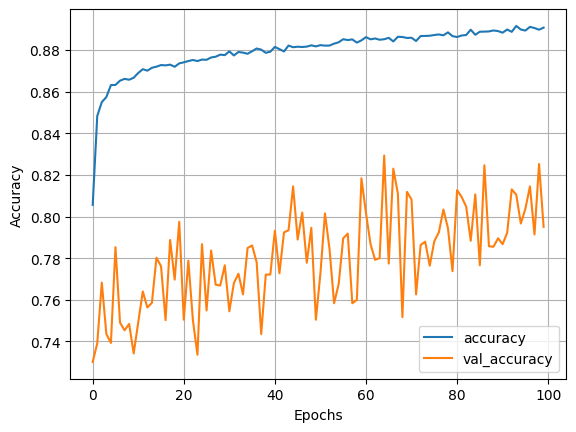

In [38]:
plot_accuracy(history)